In [30]:
from data_utils import get_class_names, calculate_ece
from data_utils import calculate_mce, calculate_cece, calculate_ace
from plot_utils import plot_loss, plot_histogram_balance_of_dataset, plot_confusion_matrix, plot_multiclass_roc_auc, \
    plot_metrics_table, plot_histogram_confidence
from model import Model
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from plot_utils import plot_multiclass_calibration_curve

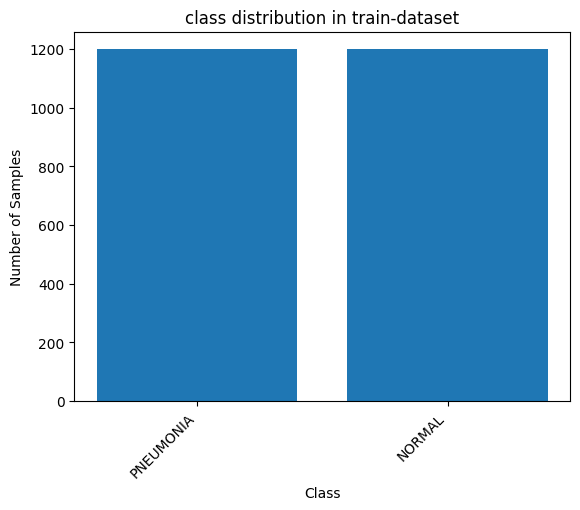

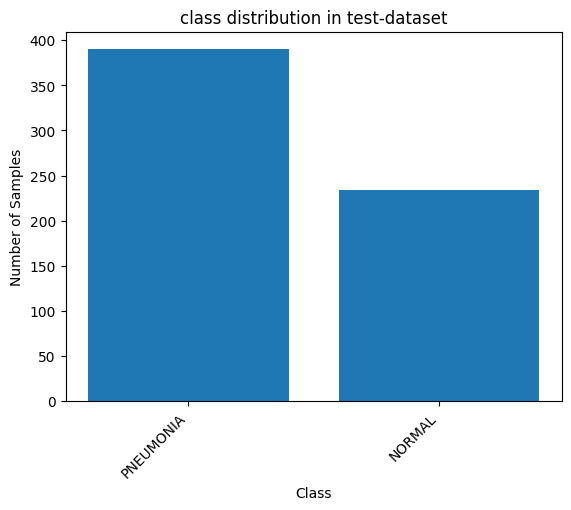

In [31]:
train_val_split_ratio = 0.9
batch_size = 3
learning_rate = 1e-3
patience_early_stopping = 5
patience_reduce_learning_rate = 2
weight_decay = 1e-4  
momentum = 0.9
epochs = 300
train_dir = "train_data_chest_xray_balanced"
test_dir = "chest_xray/test"

model = Model(learning_rate=learning_rate, batch_size=batch_size, patience_early_stopping=patience_early_stopping,
              patience_reduce_learning_rate=patience_reduce_learning_rate, train_dir=train_dir,
              weight_decay=weight_decay, momentum=momentum, test_dir=test_dir,
              train_val_split_ratio=train_val_split_ratio)
plot_histogram_balance_of_dataset(train_dir, "class distribution in train-dataset")
plot_histogram_balance_of_dataset(test_dir, "class distribution in test-dataset")

In [ ]:
train_losses, val_losses = model.train_model(epochs)

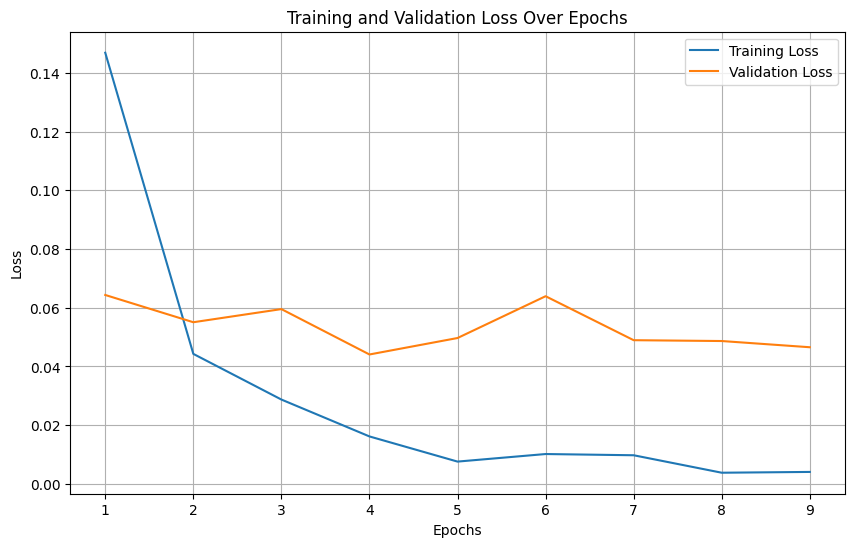

In [19]:
plot_loss(train_losses, val_losses)

In [20]:
true_labels, predicted_labels_baseline, confidence_baseline, _, logits_baseline = model.evaluate()

In [21]:

model.optimize_platt_scaling(lr=1e-2)
model.optimize_temperature(lr=1e-2)
model.optimize_histogram_binning(n_bins=10)
model.optimize_isotonic_calibration()
model.optimize_beta_calibration()
model.optimize_spline_calibration()

In [22]:
predicted_labels_platt_scaling, confidence_platt_scaling = model.evaluate_with_platt_scaling(logits_baseline)

predicted_labels_temperature_scaling, confidence_temperature_scaling = model.evaluate_with_temperature_scaling(
    logits_baseline)

predicted_labels_histogram_binning, confidence_histogram_binning = model.evaluate_with_histogram_binning(
    confidence_baseline)

predicted_labels_isotonic_calibration, confidence_isotonic_calibration = model.evaluate_with_isotonic_calibration(
    confidence_baseline)

predicted_labels_beta_calibration, confidence_beta_calibration = model.evaluate_with_beta_calibration(
    confidence_baseline)

predicted_labels_spline_calibration, confidence_spline_calibration = model.evaluate_with_spline_calibration(
    confidence_baseline)


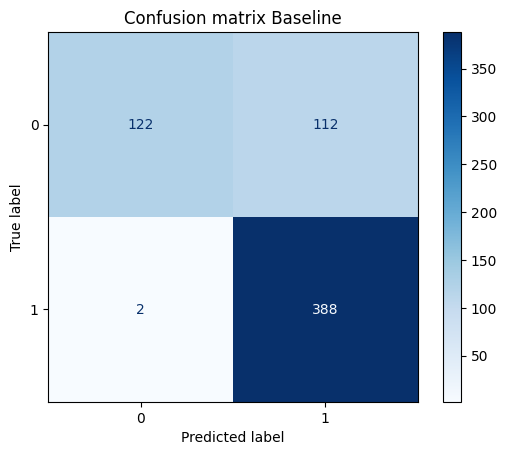

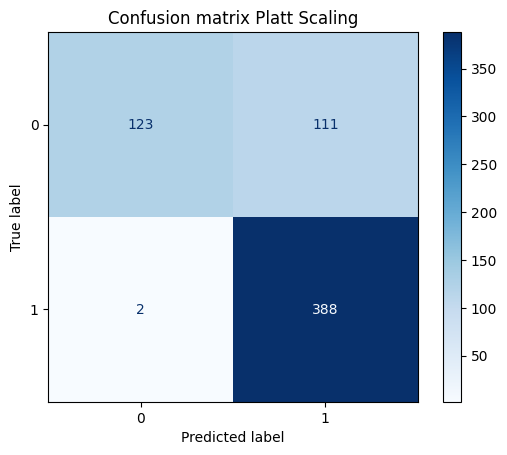

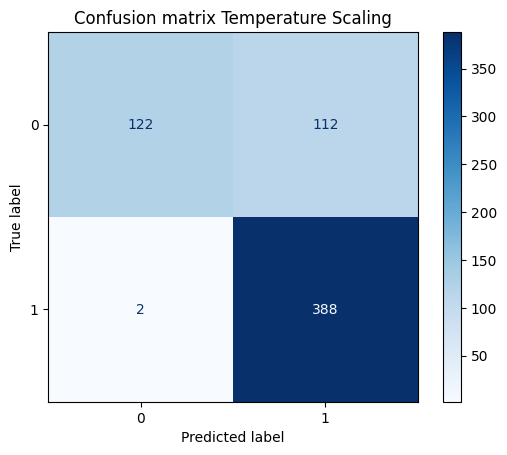

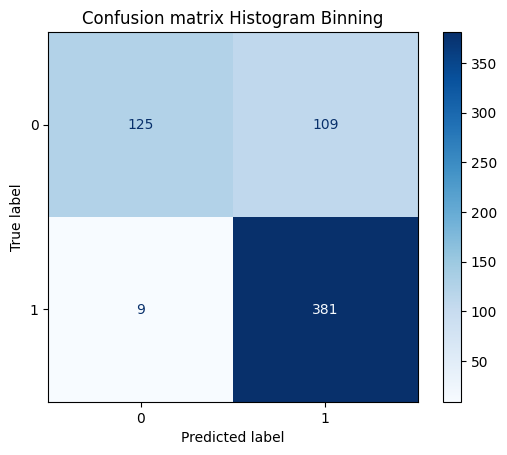

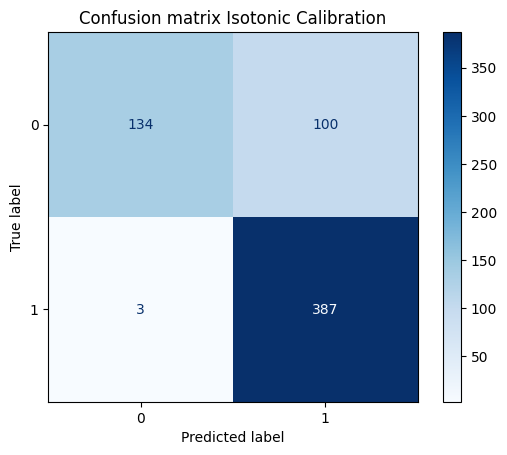

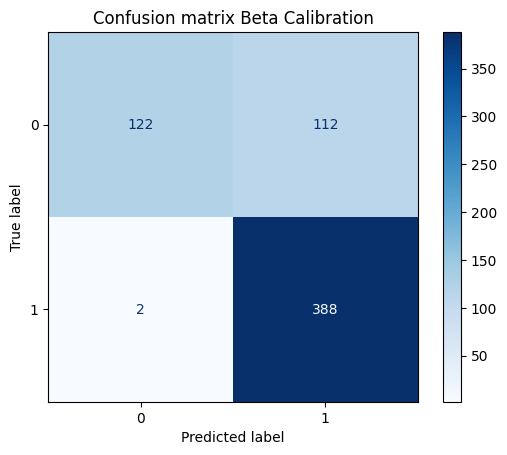

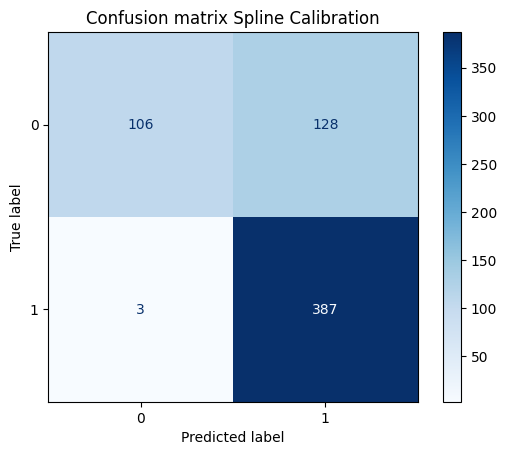

In [23]:
plot_confusion_matrix(true_labels=true_labels,
                      predicted_labels=predicted_labels_baseline,
                      title="Confusion matrix Baseline")

plot_confusion_matrix(true_labels=true_labels,
                      predicted_labels=predicted_labels_platt_scaling,
                      title="Confusion matrix Platt Scaling")

plot_confusion_matrix(true_labels=true_labels,
                      predicted_labels=predicted_labels_temperature_scaling,
                      title="Confusion matrix Temperature Scaling")

plot_confusion_matrix(true_labels=true_labels,
                      predicted_labels=predicted_labels_histogram_binning,
                      title="Confusion matrix Histogram Binning")

plot_confusion_matrix(true_labels=true_labels,
                      predicted_labels=predicted_labels_isotonic_calibration,
                      title="Confusion matrix Isotonic Calibration")

plot_confusion_matrix(true_labels=true_labels,
                      predicted_labels=predicted_labels_beta_calibration,
                      title="Confusion matrix Beta Calibration")

plot_confusion_matrix(true_labels=true_labels,
                      predicted_labels=predicted_labels_spline_calibration,
                      title="Confusion matrix Spline Calibration")

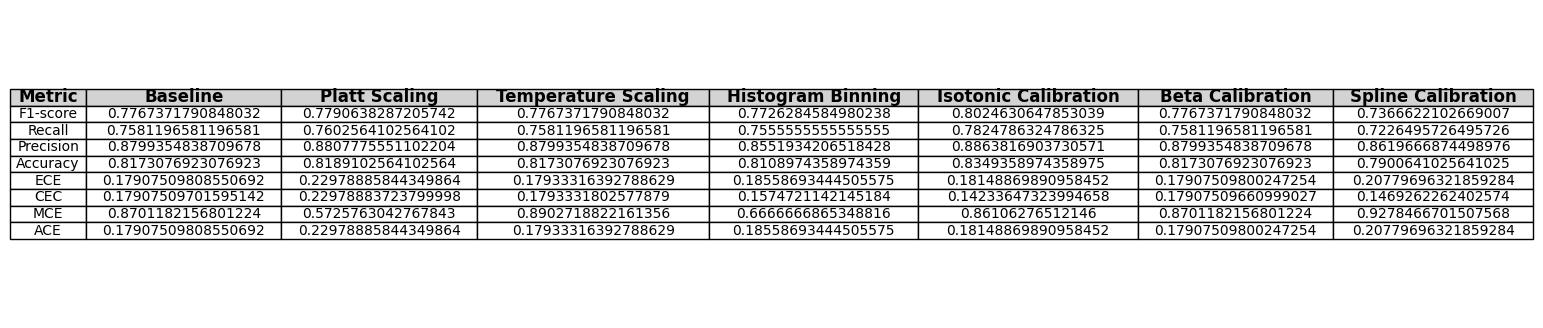

In [24]:
results = {
    "Metric": ["F1-score", "Recall", "Precision", "Accuracy", "ECE", "CEC", "MCE", "ACE"],
    "Baseline": [
        f1_score(true_labels, predicted_labels_baseline, average='macro', zero_division=0),
        recall_score(true_labels, predicted_labels_baseline, average='macro', zero_division=0),
        precision_score(true_labels, predicted_labels_baseline, average='macro', zero_division=0),
        accuracy_score(true_labels, predicted_labels_baseline),
        calculate_ece(true_labels, confidence_baseline[:, 1]),
        calculate_cece(true_labels, confidence_baseline),
        calculate_mce(true_labels, confidence_baseline[:, 1]),
        calculate_ace(true_labels, confidence_baseline[:, 1])
    ],
    "Platt Scaling": [
        f1_score(true_labels, predicted_labels_platt_scaling, average='macro', zero_division=0),
        recall_score(true_labels, predicted_labels_platt_scaling, average='macro', zero_division=0),
        precision_score(true_labels, predicted_labels_platt_scaling, average='macro', zero_division=0),
        accuracy_score(true_labels, predicted_labels_platt_scaling),
        calculate_ece(true_labels, confidence_platt_scaling[:, 1]),
        calculate_cece(true_labels, confidence_platt_scaling),
        calculate_mce(true_labels, confidence_platt_scaling[:, 1]),
        calculate_ace(true_labels, confidence_platt_scaling[:, 1])
    ],
    "Temperature Scaling": [
        f1_score(true_labels, predicted_labels_temperature_scaling, average='macro',
                 zero_division=0),
        recall_score(true_labels, predicted_labels_temperature_scaling, average='macro',
                     zero_division=0),
        precision_score(true_labels, predicted_labels_temperature_scaling, average='macro',
                        zero_division=0),
        accuracy_score(true_labels, predicted_labels_temperature_scaling),
        calculate_ece(true_labels, confidence_temperature_scaling[:, 1]),
        calculate_cece(true_labels, confidence_temperature_scaling),
        calculate_mce(true_labels, confidence_temperature_scaling[:, 1]),
        calculate_ace(true_labels, confidence_temperature_scaling[:, 1])
    ],
    "Histogram Binning": [
        f1_score(true_labels, predicted_labels_histogram_binning, average='macro',
                 zero_division=0),
        recall_score(true_labels, predicted_labels_histogram_binning, average='macro',
                     zero_division=0),
        precision_score(true_labels, predicted_labels_histogram_binning, average='macro',
                        zero_division=0),
        accuracy_score(true_labels, predicted_labels_histogram_binning),
        calculate_ece(true_labels, confidence_histogram_binning[:, 1]),
        calculate_cece(true_labels, confidence_histogram_binning),
        calculate_mce(true_labels, confidence_histogram_binning[:, 1]),
        calculate_ace(true_labels, confidence_histogram_binning[:, 1])
    ],
    "Isotonic Calibration": [
        f1_score(true_labels, predicted_labels_isotonic_calibration, average='macro',
                 zero_division=0),
        recall_score(true_labels, predicted_labels_isotonic_calibration, average='macro',
                     zero_division=0),
        precision_score(true_labels, predicted_labels_isotonic_calibration, average='macro',
                        zero_division=0),
        accuracy_score(true_labels, predicted_labels_isotonic_calibration),
        calculate_ece(true_labels, confidence_isotonic_calibration[:, 1]),
        calculate_cece(true_labels, confidence_isotonic_calibration),
        calculate_mce(true_labels, confidence_isotonic_calibration[:, 1]),
        calculate_ace(true_labels, confidence_isotonic_calibration[:, 1])
    ],
    "Beta Calibration": [
        f1_score(true_labels, predicted_labels_beta_calibration, average='macro',
                 zero_division=0),
        recall_score(true_labels, predicted_labels_beta_calibration, average='macro',
                     zero_division=0),
        precision_score(true_labels, predicted_labels_beta_calibration, average='macro',
                        zero_division=0),
        accuracy_score(true_labels, predicted_labels_beta_calibration),
        calculate_ece(true_labels, confidence_beta_calibration[:, 1]),
        calculate_cece(true_labels, confidence_beta_calibration),
        calculate_mce(true_labels, confidence_beta_calibration[:, 1]),
        calculate_ace(true_labels, confidence_beta_calibration[:, 1])
    ],
    "Spline Calibration": [
        f1_score(true_labels, predicted_labels_spline_calibration, average='macro',
                 zero_division=0),
        recall_score(true_labels, predicted_labels_spline_calibration, average='macro',
                     zero_division=0),
        precision_score(true_labels, predicted_labels_spline_calibration, average='macro',
                        zero_division=0),
        accuracy_score(true_labels, predicted_labels_spline_calibration),
        calculate_ece(true_labels, confidence_spline_calibration[:, 1]),
        calculate_cece(true_labels, confidence_spline_calibration),
        calculate_mce(true_labels, confidence_spline_calibration[:, 1]),
        calculate_ace(true_labels, confidence_spline_calibration[:, 1])
    ]
}

plot_metrics_table(results)

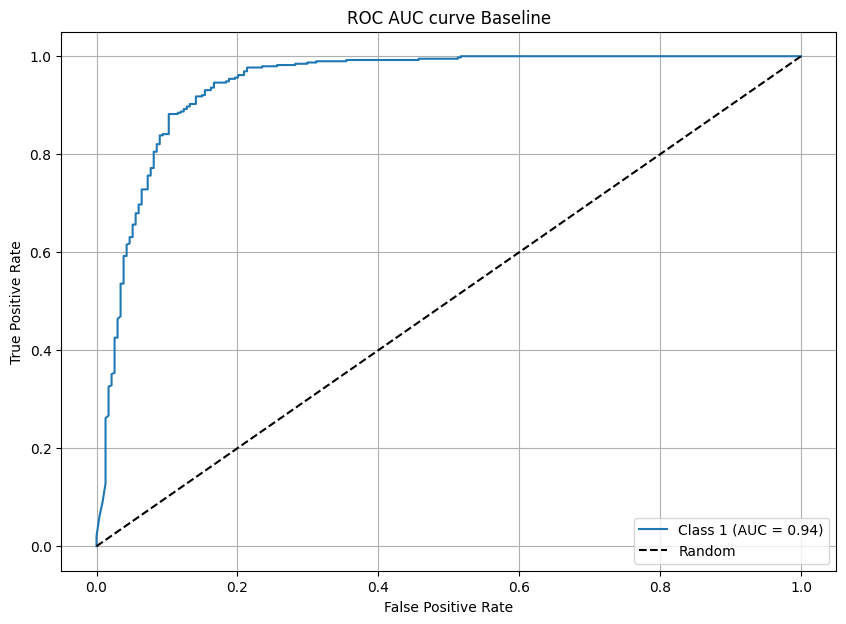

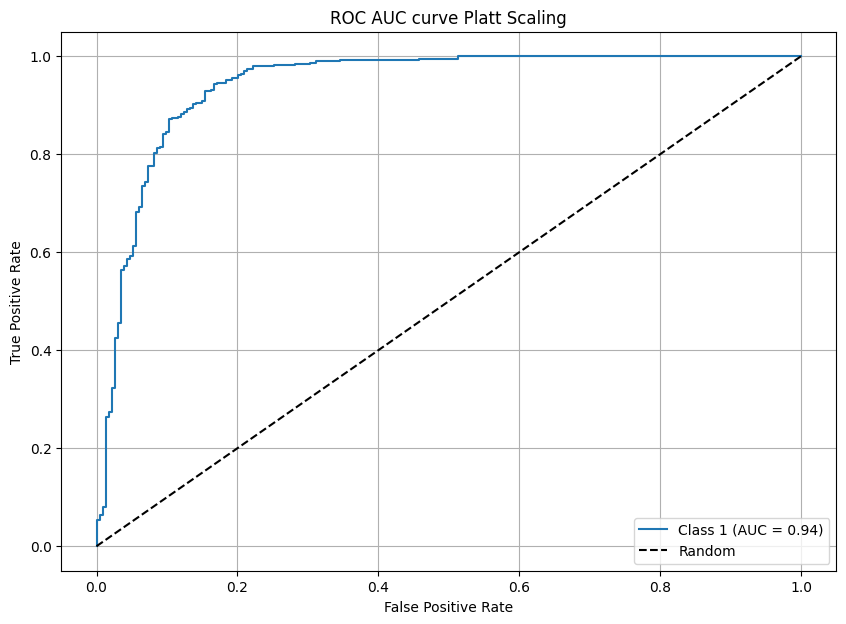

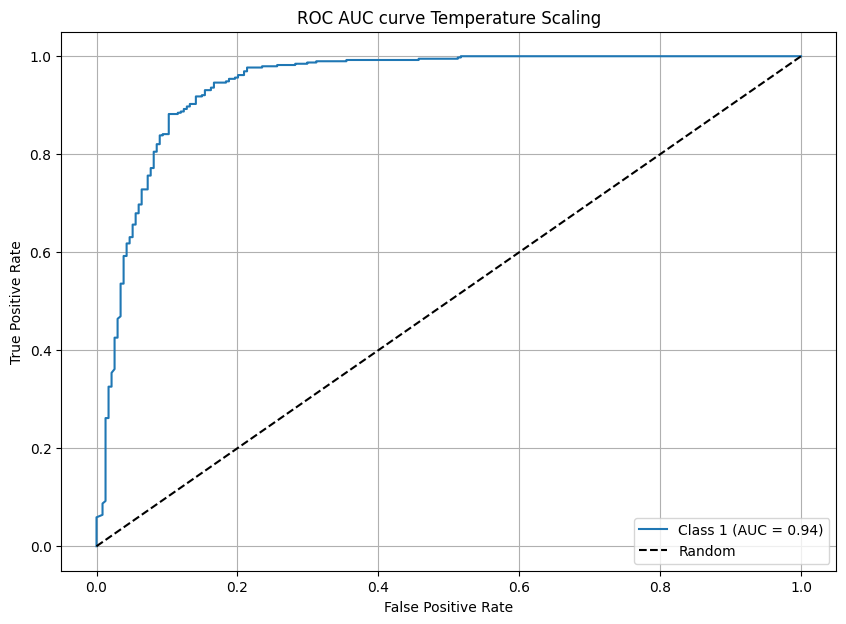

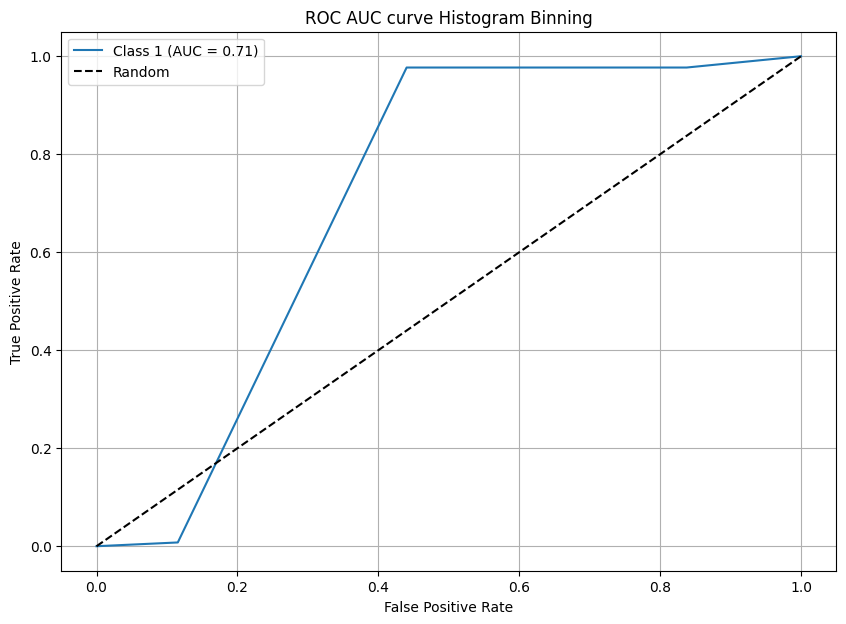

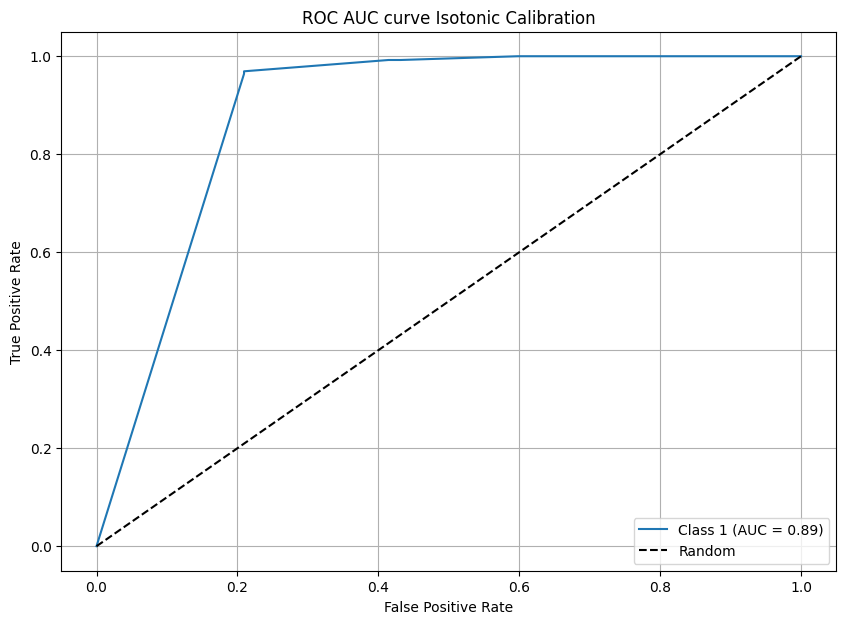

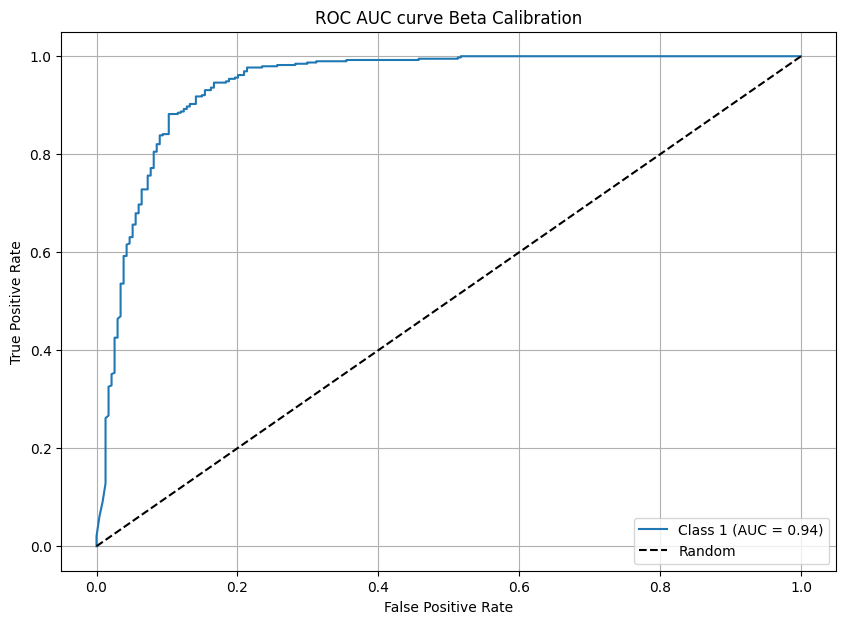

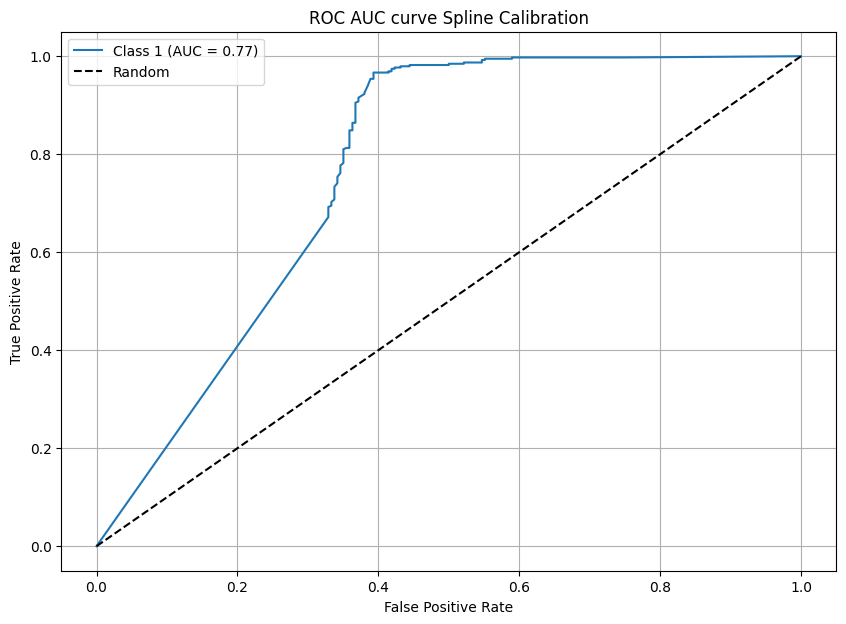

In [25]:
plot_multiclass_roc_auc(y_true=true_labels,
                        y_pred_proba=confidence_baseline,
                        title="ROC AUC curve Baseline")

plot_multiclass_roc_auc(y_true=true_labels,
                        y_pred_proba=confidence_platt_scaling,
                        title="ROC AUC curve Platt Scaling")

plot_multiclass_roc_auc(y_true=true_labels,
                        y_pred_proba=confidence_temperature_scaling,
                        title="ROC AUC curve Temperature Scaling")

plot_multiclass_roc_auc(y_true=true_labels,
                        y_pred_proba=confidence_histogram_binning,
                        title="ROC AUC curve Histogram Binning")
plot_multiclass_roc_auc(y_true=true_labels,
                        y_pred_proba=confidence_isotonic_calibration,
                        title="ROC AUC curve Isotonic Calibration")
plot_multiclass_roc_auc(y_true=true_labels,
                        y_pred_proba=confidence_beta_calibration,
                        title="ROC AUC curve Beta Calibration")
plot_multiclass_roc_auc(y_true=true_labels,
                        y_pred_proba=confidence_spline_calibration,
                        title="ROC AUC curve Spline Calibration")

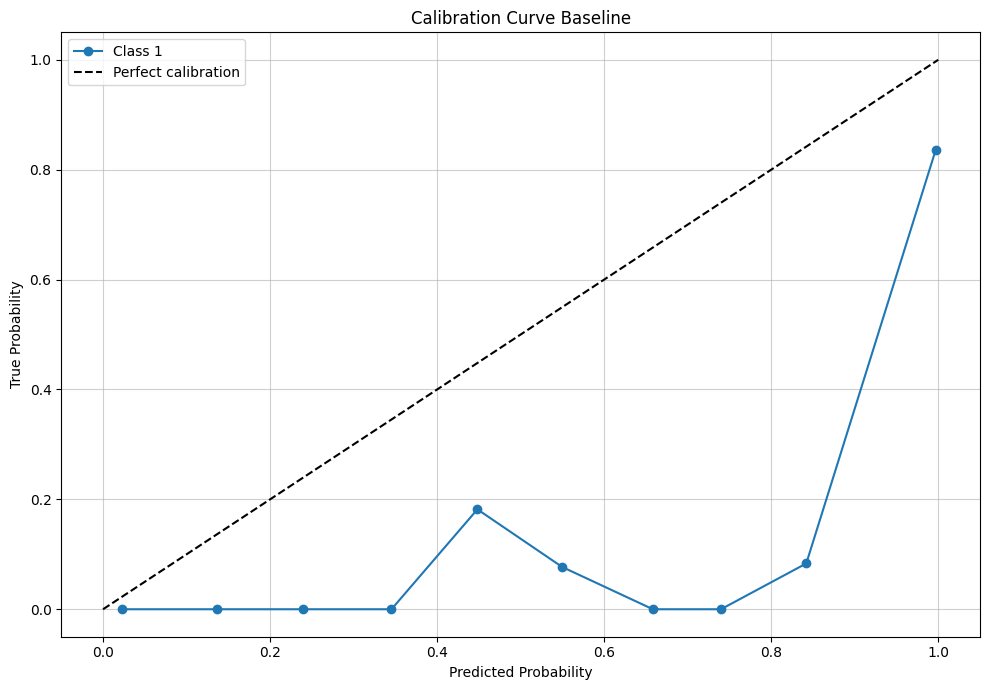

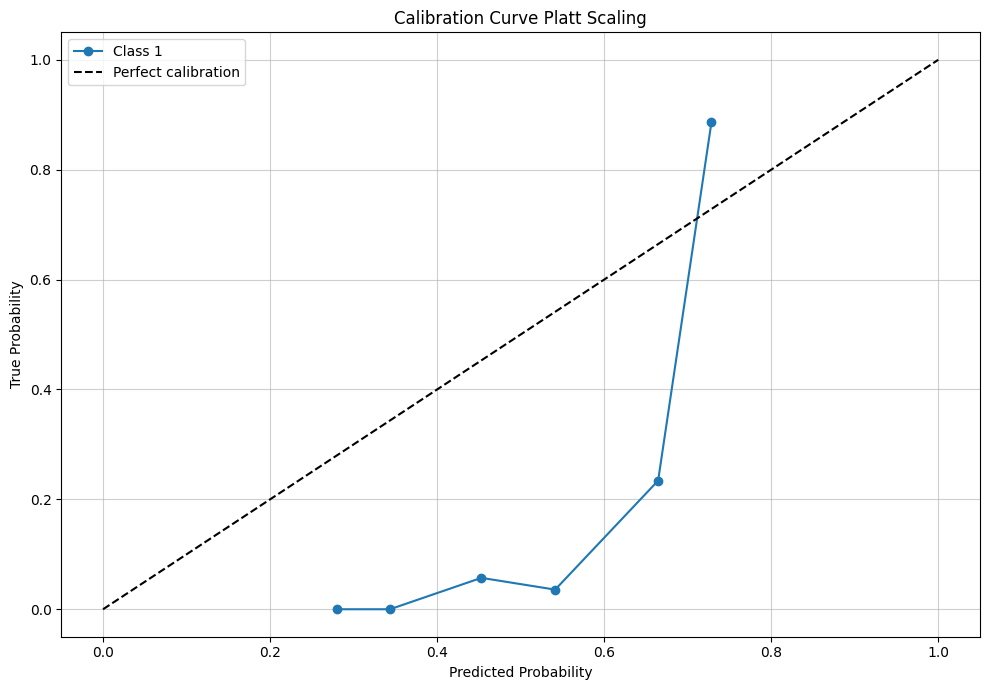

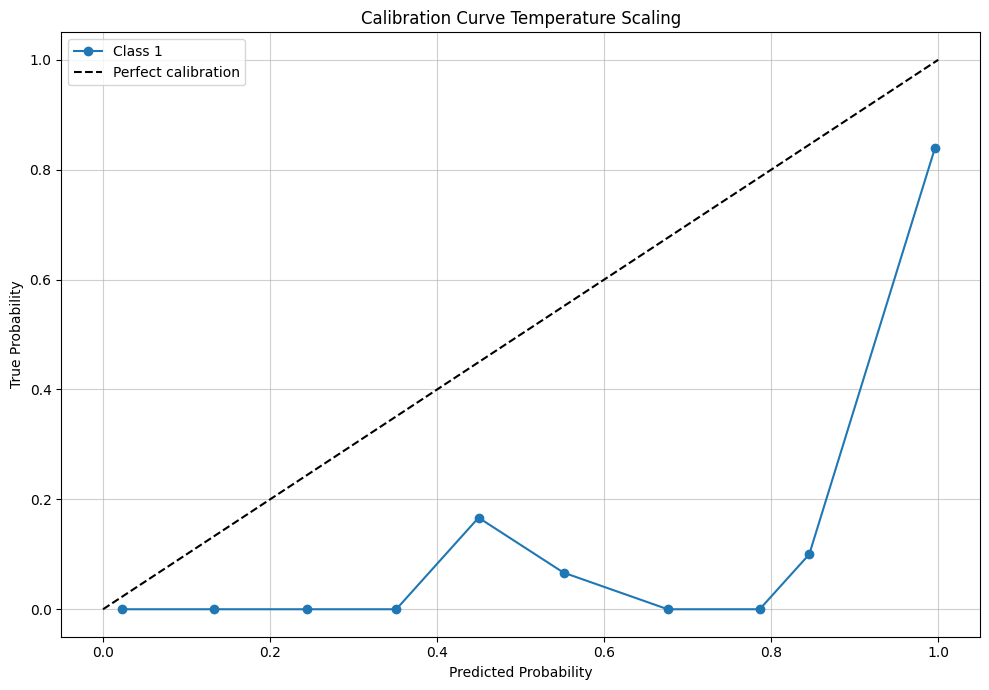

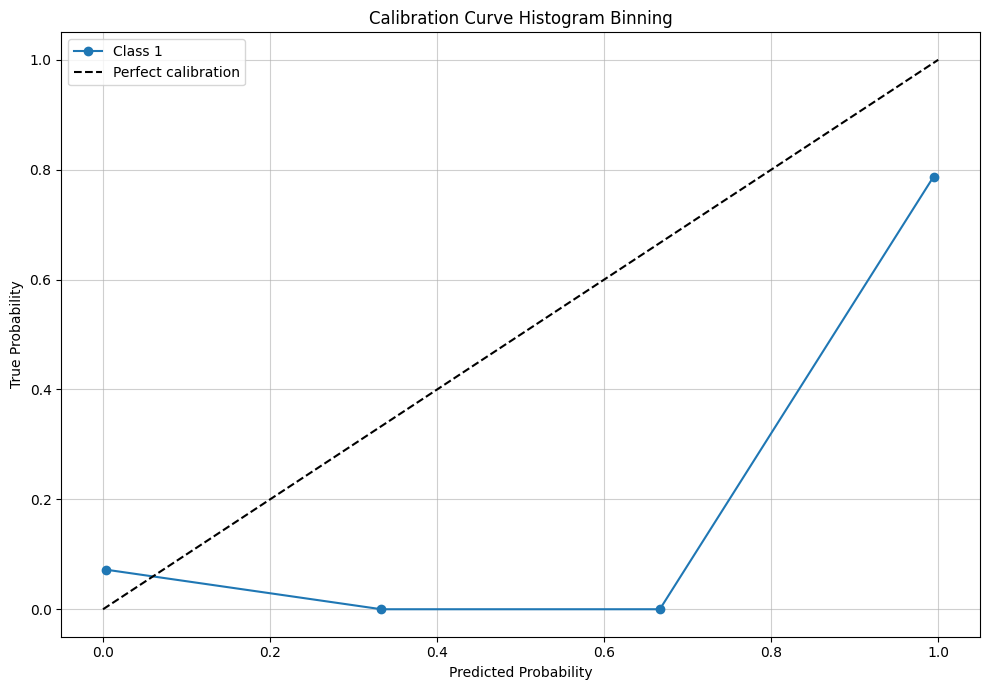

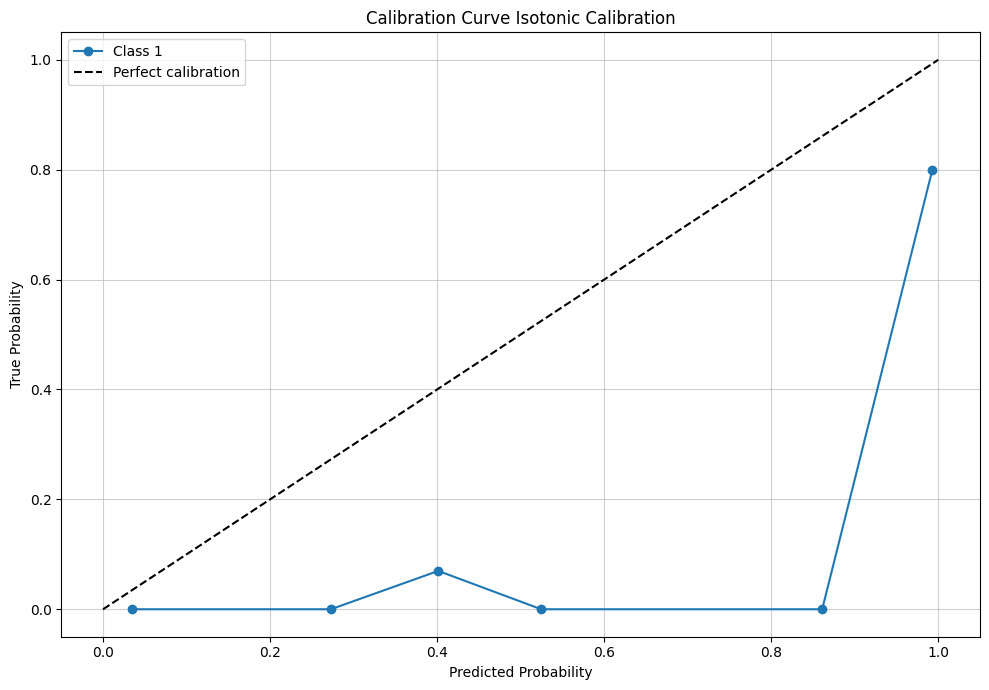

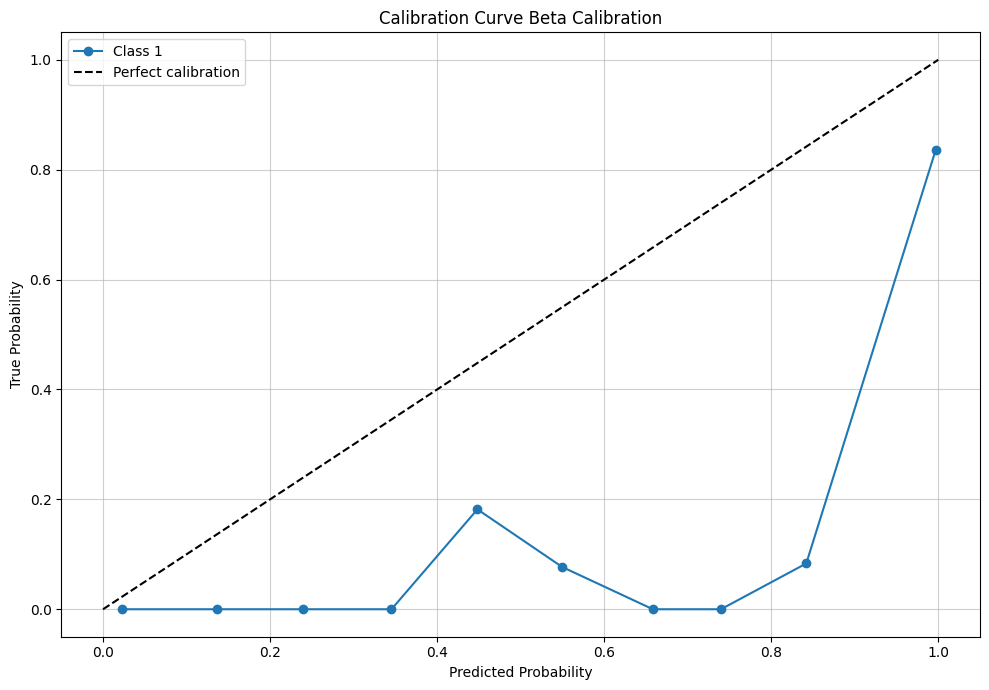

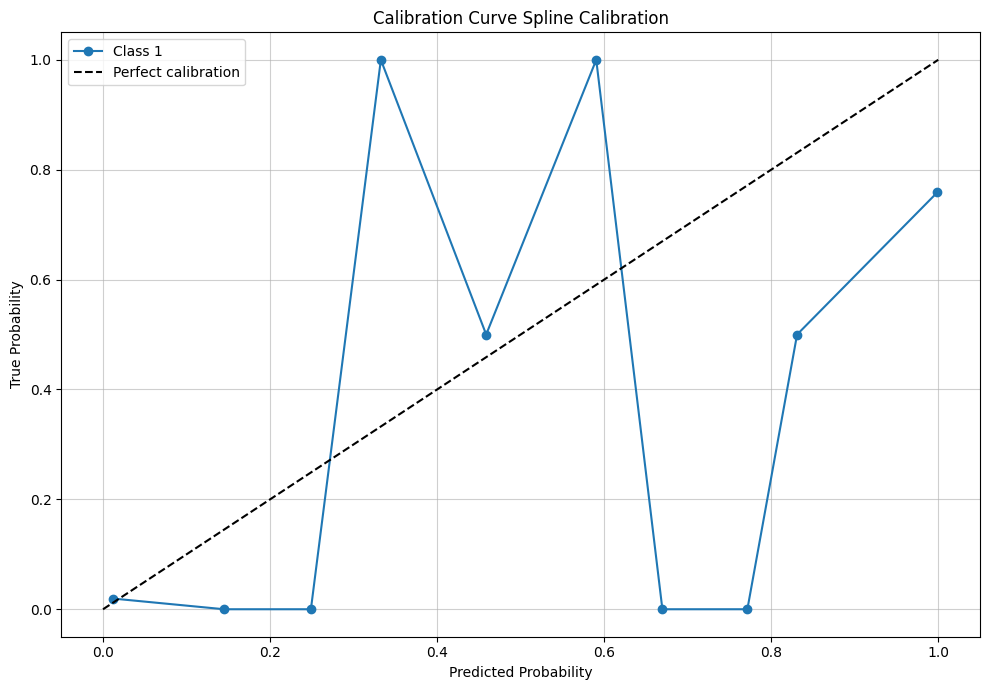

In [26]:
plot_multiclass_calibration_curve(true_labels, confidence_baseline,
                                  title="Calibration Curve Baseline")

plot_multiclass_calibration_curve(true_labels, confidence_platt_scaling,
                                  title="Calibration Curve Platt Scaling")

plot_multiclass_calibration_curve(true_labels, confidence_temperature_scaling,
                                  title="Calibration Curve Temperature Scaling")

plot_multiclass_calibration_curve(true_labels, confidence_histogram_binning,
                                  title="Calibration Curve Histogram Binning")

plot_multiclass_calibration_curve(true_labels, confidence_isotonic_calibration,
                                  title="Calibration Curve Isotonic Calibration")

plot_multiclass_calibration_curve(true_labels, confidence_beta_calibration,
                                  title="Calibration Curve Beta Calibration")

plot_multiclass_calibration_curve(true_labels, confidence_spline_calibration,
                                  title="Calibration Curve Spline Calibration")

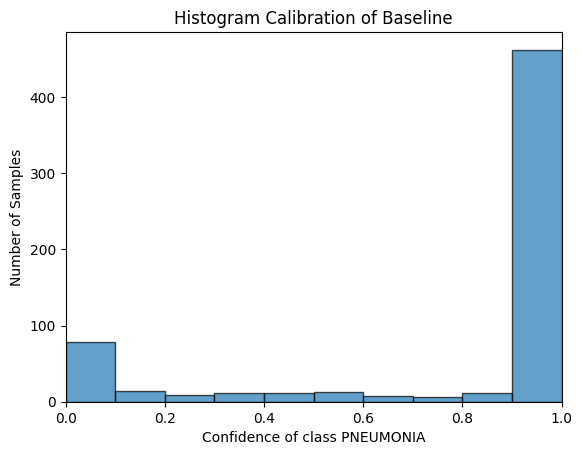

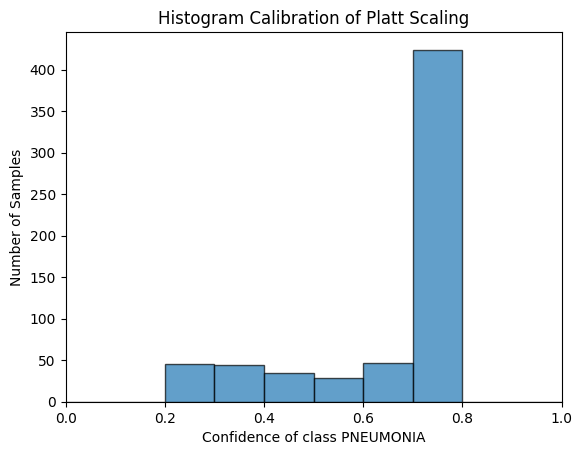

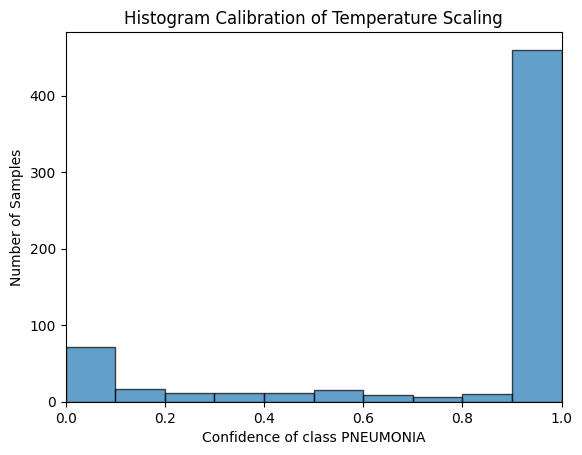

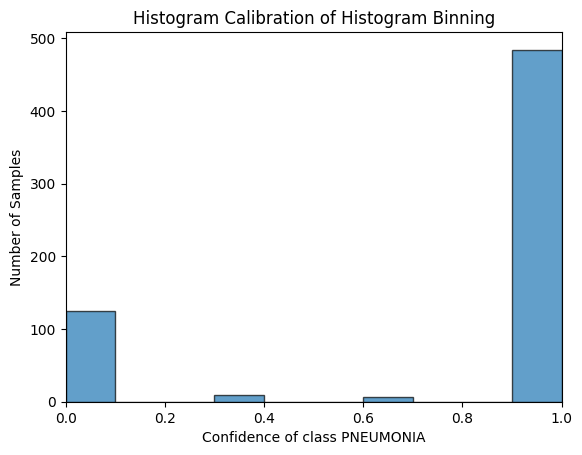

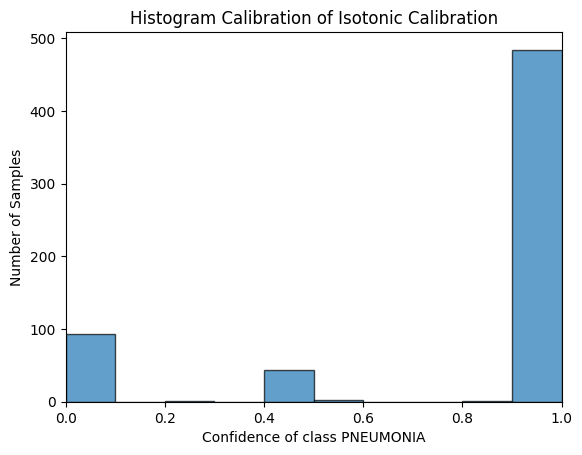

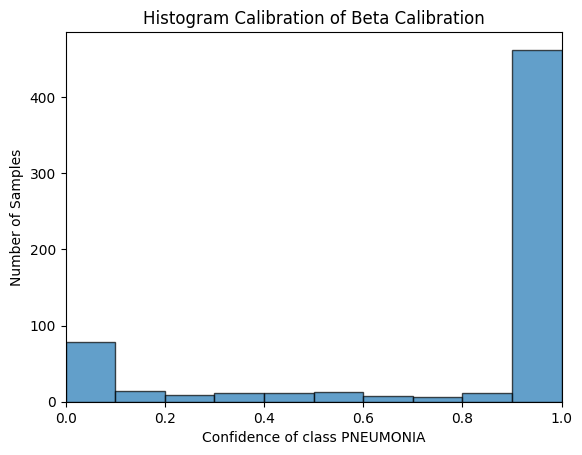

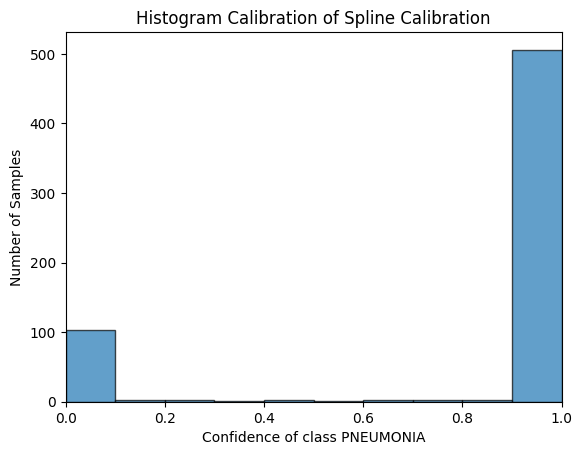

In [27]:
class_mappings = model.get_class_mappings()
index_pneumonia = class_mappings['PNEUMONIA']
plot_histogram_confidence(confidence_baseline[:, index_pneumonia], 'PNEUMONIA', "Histogram Calibration of Baseline")
plot_histogram_confidence(confidence_platt_scaling[:, index_pneumonia], 'PNEUMONIA', "Histogram Calibration of Platt Scaling")
plot_histogram_confidence(confidence_temperature_scaling[:, index_pneumonia],'PNEUMONIA',
                          "Histogram Calibration of Temperature Scaling")
plot_histogram_confidence(confidence_histogram_binning[:, index_pneumonia], 'PNEUMONIA',
                          "Histogram Calibration of Histogram Binning")

plot_histogram_confidence(confidence_isotonic_calibration[:, index_pneumonia], 'PNEUMONIA',
                          "Histogram Calibration of Isotonic Calibration")

plot_histogram_confidence(confidence_beta_calibration[:, index_pneumonia], 'PNEUMONIA',
                          "Histogram Calibration of Beta Calibration")

plot_histogram_confidence(confidence_spline_calibration[:, index_pneumonia], 'PNEUMONIA',
                          "Histogram Calibration of Spline Calibration")


In [28]:
import torch
torch.save(model.model.state_dict(), "model.pth")

In [29]:
model.load_existing_model("model.pth")

Model loaded from model.pth
